In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dist =np.random.normal(2,.5,1000)#Mean, variance, no. of points
dist2=np.random.normal(0,1,1000)#Standard normal distribution

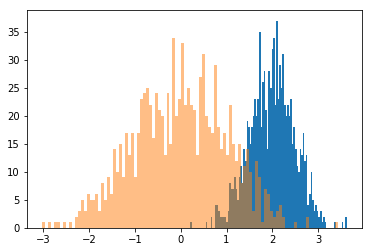

In [3]:
plt.hist(dist,100)#(datapoints,no. of buckets created,transparency)
plt.hist(dist2,100,alpha=0.5)
plt.show()

# Multivariate case

In [2]:
monkey_data=np.random.multivariate_normal([1,2],[[1.5,0.5],[0.5,1]],1000)
chimpanzee_data=np.random.multivariate_normal([3,4],[[1,0],[0,2]],1000)
print(monkey_data.shape)

(1000, 2)


In [3]:
print(monkey_data[:5,:])

[[ 1.04743823  1.2967305 ]
 [-0.52497764  0.34658553]
 [ 0.99332962  1.76680949]
 [-0.74961627  1.04491805]
 [ 0.95898031  2.2509789 ]]


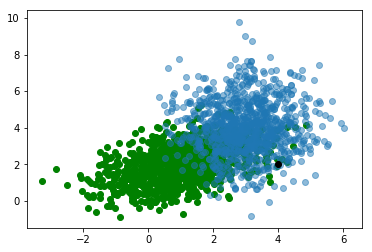

In [26]:
plt.scatter(monkey_data[:,0],monkey_data[:,1],label="monkey",c='g')
plt.scatter(chimpanzee_data[:,0],chimpanzee_data[:,1],alpha=0.5,label="chimpanzee")
plt.scatter(4,2,c='k')
plt.show()

# K-nearest neighbours

In [5]:
data=np.zeros((2000,3))
data[:1000,:-1]=monkey_data
data[1000:,:-1]=chimpanzee_data
data[1000:,-1]=1
print(data)
print(data.shape)

[[ 1.04743823  1.2967305   0.        ]
 [-0.52497764  0.34658553  0.        ]
 [ 0.99332962  1.76680949  0.        ]
 ...
 [ 4.22793125  2.29988354  1.        ]
 [ 3.54932574  6.16182372  1.        ]
 [ 4.25468661  4.46205037  1.        ]]
(2000, 3)


In [6]:
x_train=data[:,:-1]
y_train=data[:,-1]
print(x_train.shape)
print(y_train.shape)

(2000, 2)
(2000,)


In [22]:
print(x_train)

[[ 1.04743823  1.2967305 ]
 [-0.52497764  0.34658553]
 [ 0.99332962  1.76680949]
 ...
 [ 4.22793125  2.29988354]
 [ 3.54932574  6.16182372]
 [ 4.25468661  4.46205037]]


In [56]:


def dist(x1,x2):
    return np.sqrt(((x2-x1)**2).sum())
    
def knn(x_train,y_train,query_x,k=5):
    #First Step
    dist_vals = []
    
    m = x_train.shape[0]
    for ix in range(m):
        d = dist(query_x,x_train[ix])
        dist_vals.append((d,y_train[ix]))
        
    dist_vals = sorted(dist_vals)
    dist_vals = dist_vals[:k]
    
    y = np.array(dist_vals)
    t = np.unique(y[:,1],return_counts=True)
    index = t[1].argmax()
    prediction  = t[0][index]
    return prediction



In [57]:
def dist(a,b):
    return np.sqrt((abs(a-b)**2).sum())
x=np.array([0,0])
x2=np.array([1,1])
print(dist(x,x2))

1.4142135623730951


In [59]:
knn(x_train,y_train,[0,2])

0.0